In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df=pd.read_csv('Road Accident Data.csv')

In [22]:
df.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [23]:
df.tail()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
307968,201091NM01760,2/18/2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,NaN,...,2,1,Northern,Dry,Single carriageway,60,7:00,Rural,Fine no high winds,Car
307969,201091NM01881,2/21/2022,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,NaN,...,1,1,Northern,Frost or ice,Single carriageway,60,3:00,Rural,Fine no high winds,Car
307970,201091NM01935,2/23/2022,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,NaN,...,1,3,Northern,Frost or ice,Single carriageway,30,9:38,Rural,Fine no high winds,Car
307971,201091NM01964,2/23/2022,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,NaN,...,1,2,Northern,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,Motorcycle over 500cc
307972,201091NM02142,2/28/2022,Sunday,Give way or uncontrolled,T or staggered junction,Serious,57.575210,Daylight,Highland,Other object on road,...,1,1,Northern,Wet or damp,Dual carriageway,60,15:45,Rural,Snowing no high winds,Car


In [24]:
df.shape

(307973, 21)

In [25]:
df.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,52.487005,-1.368884,1.356882,1.829063,38.866037
std,1.339011,1.356092,0.815857,0.710477,14.032933
min,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,53.415517,-0.206810,1.000000,2.000000,50.000000
max,60.598055,1.759398,48.000000,32.000000,70.000000


In [26]:
df.columns

Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [27]:
df.dtypes.value_counts()

,count
object,16
int64,3
float64,2


In [28]:
df.isnull().value_counts()

Accident_Index  Accident Date  Day_of_Week  Junction_Control  Junction_Detail  Accident_Severity  Latitude  Light_Conditions  Local_Authority_(District)  Carriageway_Hazards  Longitude  Number_of_Casualties  Number_of_Vehicles  Police_Force  Road_Surface_Conditions  Road_Type  Speed_limit  Time   Urban_or_Rural_Area  Weather_Conditions  Vehicle_Type
False           False          False        False             False            False              False     False             False                       True                 False      False                 False               False         False                    False      False        False  False                False               False           295190
                                                                                                                                                                                                                                                                                                                               True                False             5540
                                                                                                                                                          False                False      False                 False               False         False                    False      False        False  False                False               False             5305
                                                                                                                                                          True                 False      False                 False               False         False                    True       False        False  False                False               False             1321
                                                                                                                                                                                                                                                  True                     False      False        False  False                True                False              259
                                                                                                                                                                                                                                                  False                    True       False        False  False                True                False              173
                                                                                                                                                          False                False      False                 False               False         False                    False      False        False  False                True                False               74
                                                                                                                                                          True                 False      False                 False               False         True                     False      False        False  False                False               False               45
                                                                                                                                                          False                False      False                 False               False         False                    True       False        False  False                False               False               35
                                                                                                                                                          True                 False      False                 False               False         False                    False      False        True   False                False               False               17
                            

In [29]:
df1=df.select_dtypes(np.number)

<Axes: >

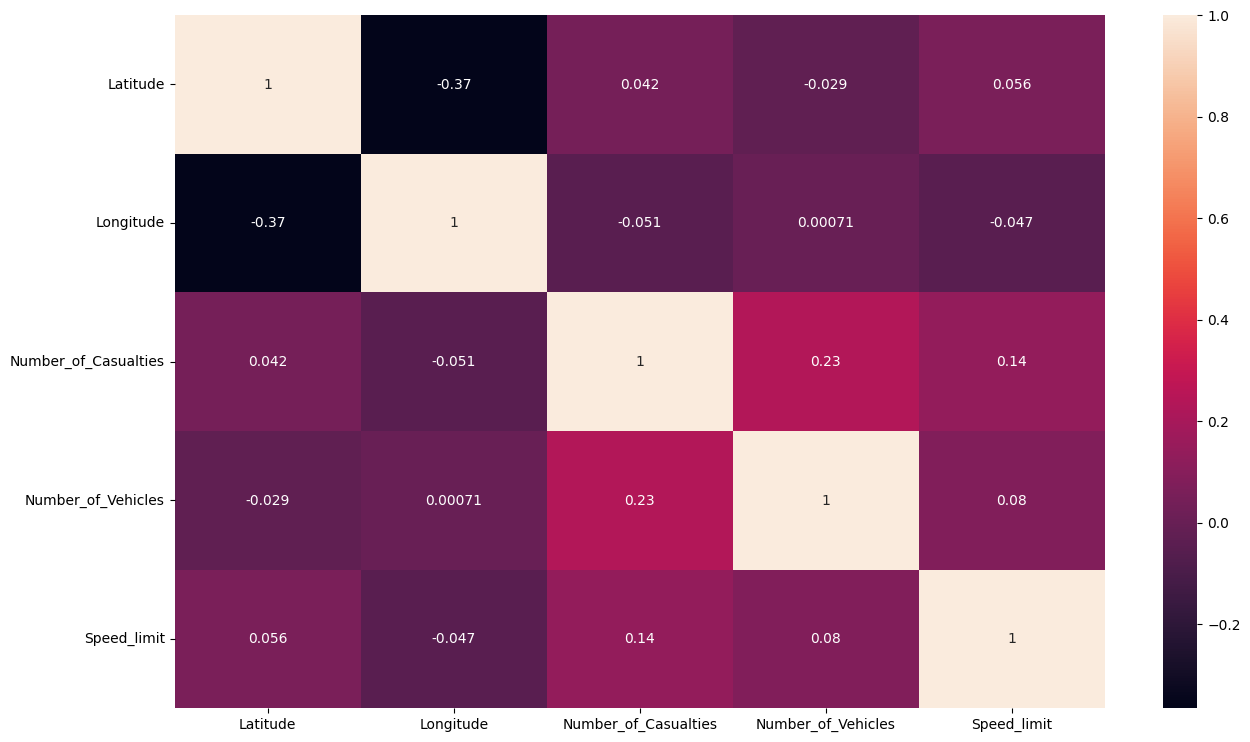

In [30]:
plt.figure(figsize=(15 ,9))
sns.heatmap(df1.corr() , annot=True)

In [31]:
def convert_to_hourly(datetime_str):
  datetime = pd.to_datetime(datetime_str)
  hour = datetime.hour + round((datetime.minute / 60), 0)
  return hour

df['Hour'] = df['Time'].apply(convert_to_hourly)

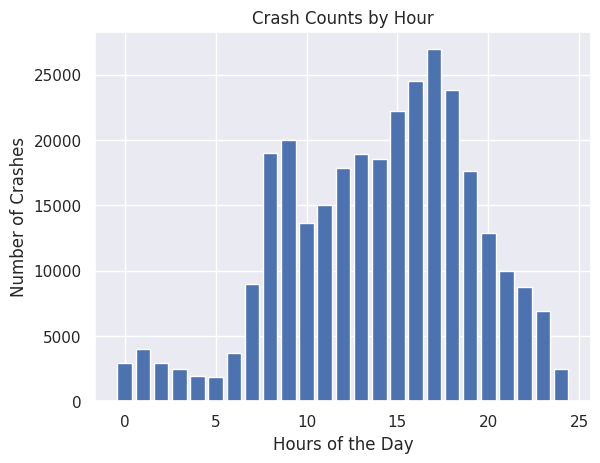

In [32]:
crushes_by_hour = df['Hour'].value_counts()
sns.set_theme(style="darkgrid")
plt.bar(crushes_by_hour.index, crushes_by_hour.values)
plt.xlabel("Hours of the Day")
plt.ylabel("Number of Crashes")
plt.title("Crash Counts by Hour")
plt.show()

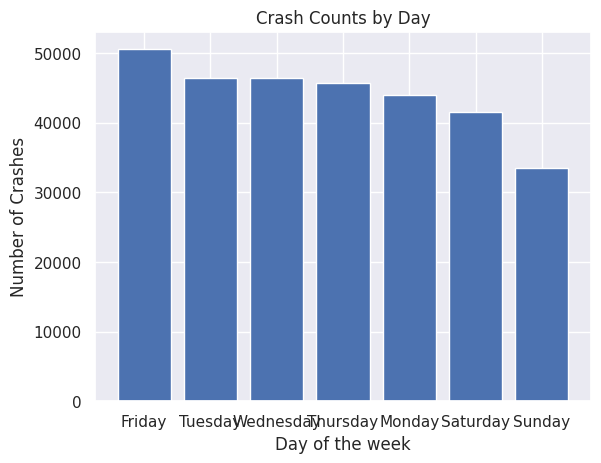

In [34]:
crashes_by_day = df['Day_of_Week'].value_counts()
plt.bar(crashes_by_day.index, crashes_by_day.values)
plt.xlabel("Day of the week")
plt.ylabel("Number of Crashes")
plt.title("Crash Counts by Day")
#plt.xticks(rotation = 90)
plt.show()

In [36]:
df2 = df[['Local_Authority_(District)','Number_of_Casualties','Number_of_Vehicles','Speed_limit']] # Use a list of column names to select multiple columns

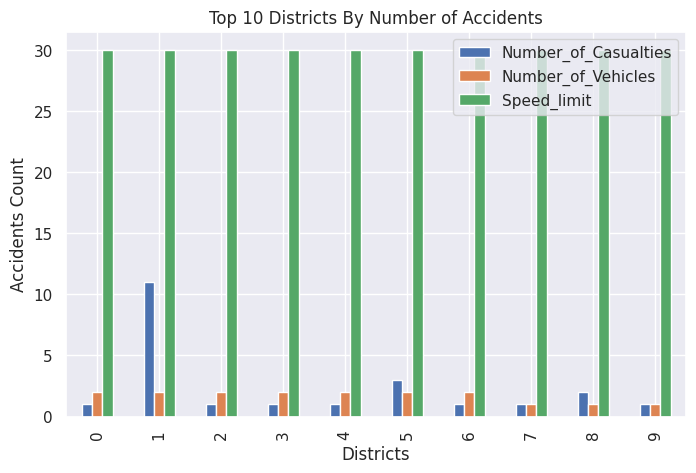

In [37]:
fig, ax = plt.subplots(figsize=(8,5))
df2[:10].plot(kind='bar', ax=ax)
ax.set(title = 'Top 10 Districts By Number of Accidents',
       xlabel = 'Districts',
       ylabel = 'Accidents Count')
plt.show()

In [38]:
accidents_severity = df.groupby('Accident_Severity').count()['Accident_Index']
accidents_severity

,Accident_Index
Accident_Severity,
Fatal,3904
Fetal,49
Serious,40740
Slight,263280


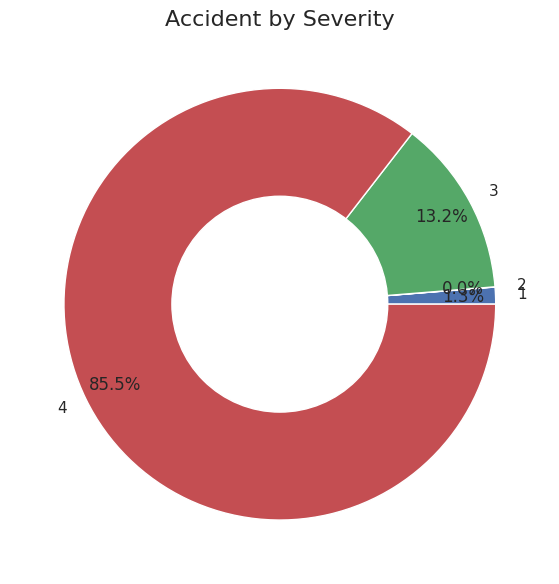

In [39]:
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
label = [1,2,3,4]
plt.pie(accidents_severity, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accident by Severity",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

In [40]:
weather_conditions = df[['Accident_Index','Accident_Severity','Weather_Conditions']] # Use a list of column names enclosed in square brackets to select multiple columns

<Axes: xlabel='Accident_Severity', ylabel='Latitude'>

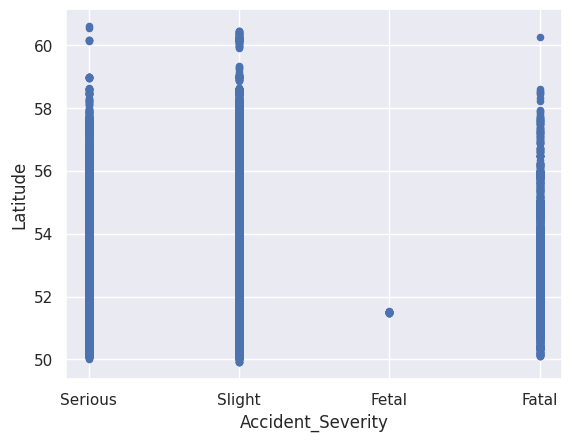

In [41]:
df.plot(kind='scatter', y='Latitude', x='Accident_Severity')

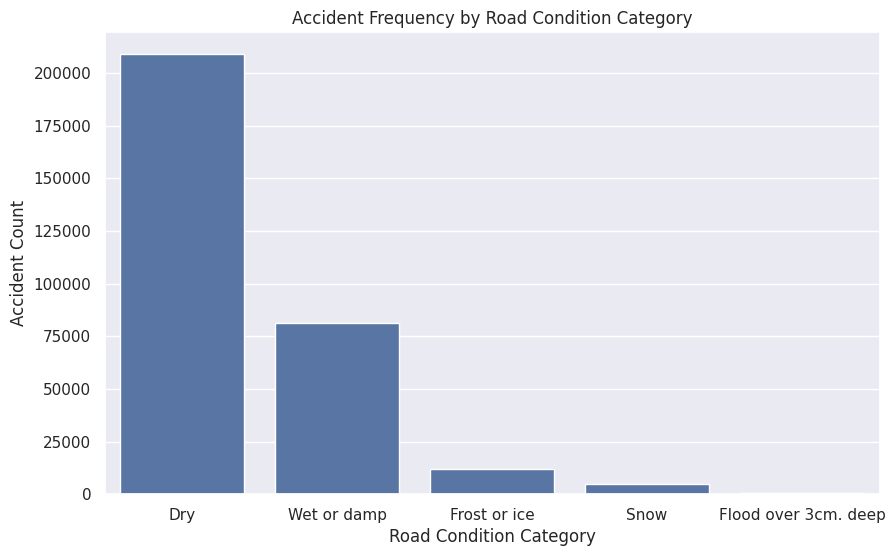

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Road_Surface_Conditions', data=df)
plt.title('Accident Frequency by Road Condition Category')
plt.xlabel('Road Condition Category')
plt.ylabel('Accident Count')
plt.show()

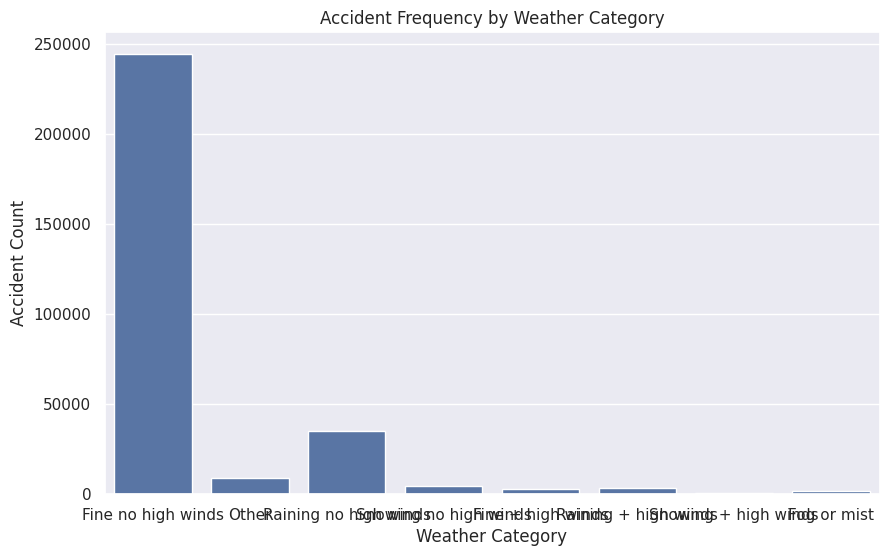

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(x='Weather_Conditions', data=df)
plt.title('Accident Frequency by Weather Category')
plt.xlabel('Weather Category')
plt.ylabel('Accident Count')
plt.show()

<ipython-input-59-f289fc836bb7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidents_by_vehicle.index, y=accidents_by_vehicle.values, palette='coolwarm')


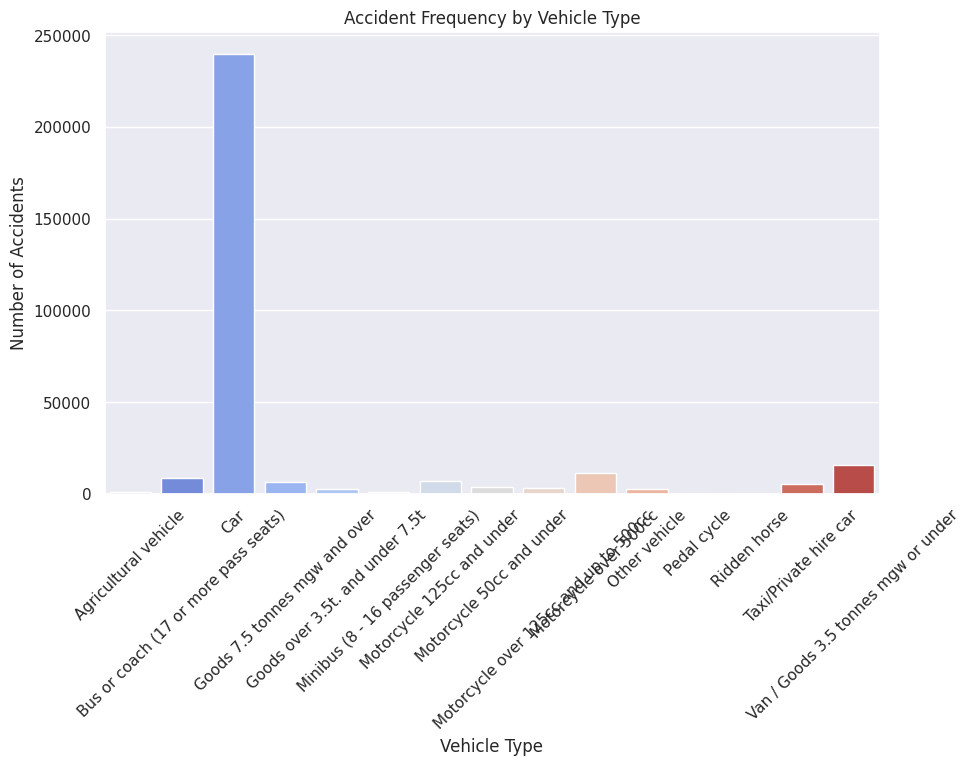

In [59]:
accidents_by_vehicle = df.groupby('Vehicle_Type').size()
plt.figure(figsize=(10,6))
sns.barplot(x=accidents_by_vehicle.index, y=accidents_by_vehicle.values, palette='coolwarm')
plt.title('Accident Frequency by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

In [60]:
features = ['Time', 'Latitude', 'Longitude']
X = df[features]

In [64]:
from sklearn.cluster import KMeans
df['Time'] = pd.to_datetime(df['Time']).astype(int) / 10**9
features = ['Time', 'Latitude', 'Longitude']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3)
df['Accident_Cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


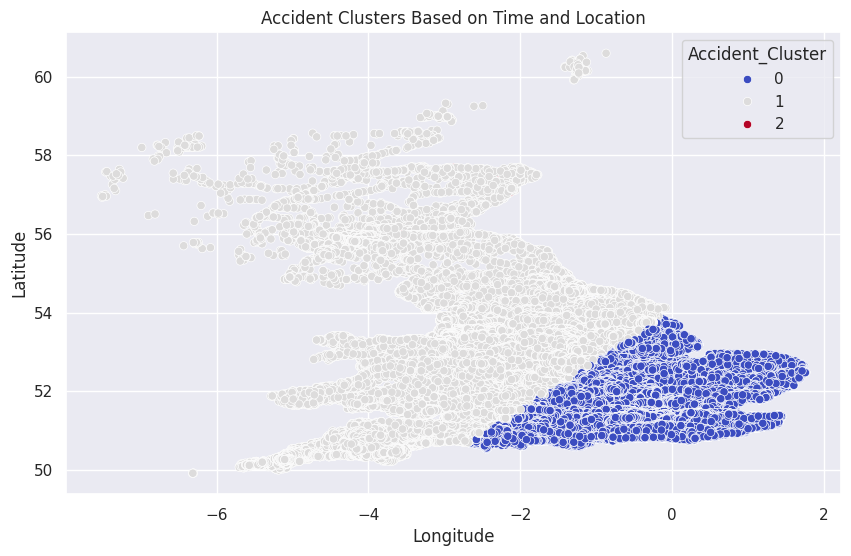

In [65]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Longitude'], y=df['Latitude'], hue=df['Accident_Cluster'], palette='coolwarm')
plt.title('Accident Clusters Based on Time and Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()